# Decision Tree VAL

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("train_cleaned.csv")
df.head()

name  duration_ms  explicit  popularity  \
0                             Long Road       241760     False          46   
1  Daniâl My Son, Where Did You Vanish?       444000     False           0   
2                    Ondskapens Galakse       333506     False           3   
3                       Can't Look Away       269800     False          23   
4                         Thunderground       307651     False          25   

                  artists              album_name  danceability  energy  key  \
0           Funki Porcini           Hed Phone Sex         0.690   0.513    5   
1           Siavash Amini    A Trail of Laughters         0.069   0.196    1   
2               Kvelertak              Nattesferd         0.363   0.854    2   
3       The Wood Brothers       One Drop of Truth         0.523   0.585    5   
4  The Darkraver;DJ Vince  Happy Hardcore Top 100         0.643   0.687    7   

   loudness  speechiness  acousticness  instrumentalness  liveness  valence  \
0   -12.529       0.0975      0.302000           0.53600     0.281   0.6350   
1   -24.801       0.0805      0.283000           0.93400     0.360   0.0336   
2    -7.445       0.0397      0.000089           0.80000     0.262   0.4890   
3    -5.607       0.0765      0.066400           0.00127     0.117   0.3850   
4   -11.340       0.0539      0.000576           0.09690     0.299   0.6370   

     tempo  time_signature        genre  
0  142.221             4.0      j-dance  
1   75.596             4.0      iranian  
2  116.628             4.0  black-metal  
3  140.880             4.0    bluegrass  
4  143.956             4.0        happy

In [8]:
np.unique(df['popularity'], return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 88, 94]),
 array([1475,  214,  144,  108,  107,  133,  186,  134,  162,  175,  214,
         211,  193,  202,  227,  216,  286,  356,  368,  412,  395,  427,
         398,  415,  358,  338,  286,  232,  231,  242,  227,  222,  205,
         180,  183,  198,  169,  195,  144,  153,  178,  202,  194,  213,
         236,  224,  222,  238,  201,  206,  187,  171,  181,  137,  149,
         134,  118,  138,  113,  103,   78,   91,   82,   73,   64,   44,
          40,   36,   22,   34,   23,   14,   24,   17,   11,    9,   12,
           8,   12,    9,    9,    9,    2,    4,    2,    2,    2,    1]))

In [9]:
np.unique(df['key'], return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([1741, 1568, 1481,  427, 1081, 1209, 1089, 1800,  905, 1431, 1063,
        1205]))

In [10]:
np.unique(df['instrumentalness'], return_counts = True)

(array([0.00e+00, 1.00e-06, 1.03e-06, ..., 9.98e-01, 9.99e-01, 1.00e+00]),
 array([3798,    4,    3, ...,    5,   15,   11]))

### Partitioning

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df = df.replace({"explicit": {False:0, True:1}})

In [13]:
attributes = ['danceability', 'tempo', 'energy','loudness','acousticness','speechiness','instrumentalness','liveness','valence','key']

In [14]:
attributes

['danceability',
 'tempo',
 'energy',
 'loudness',
 'acousticness',
 'speechiness',
 'instrumentalness',
 'liveness',
 'valence',
 'key']

In [15]:
X = df[attributes].values
y = df["genre"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

### Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [18]:
dt = DecisionTreeClassifier()

In [19]:
%%time
dt.fit(X_train, y_train)

CPU times: user 187 ms, sys: 5.3 ms, total: 192 ms
Wall time: 193 ms


DecisionTreeClassifier()

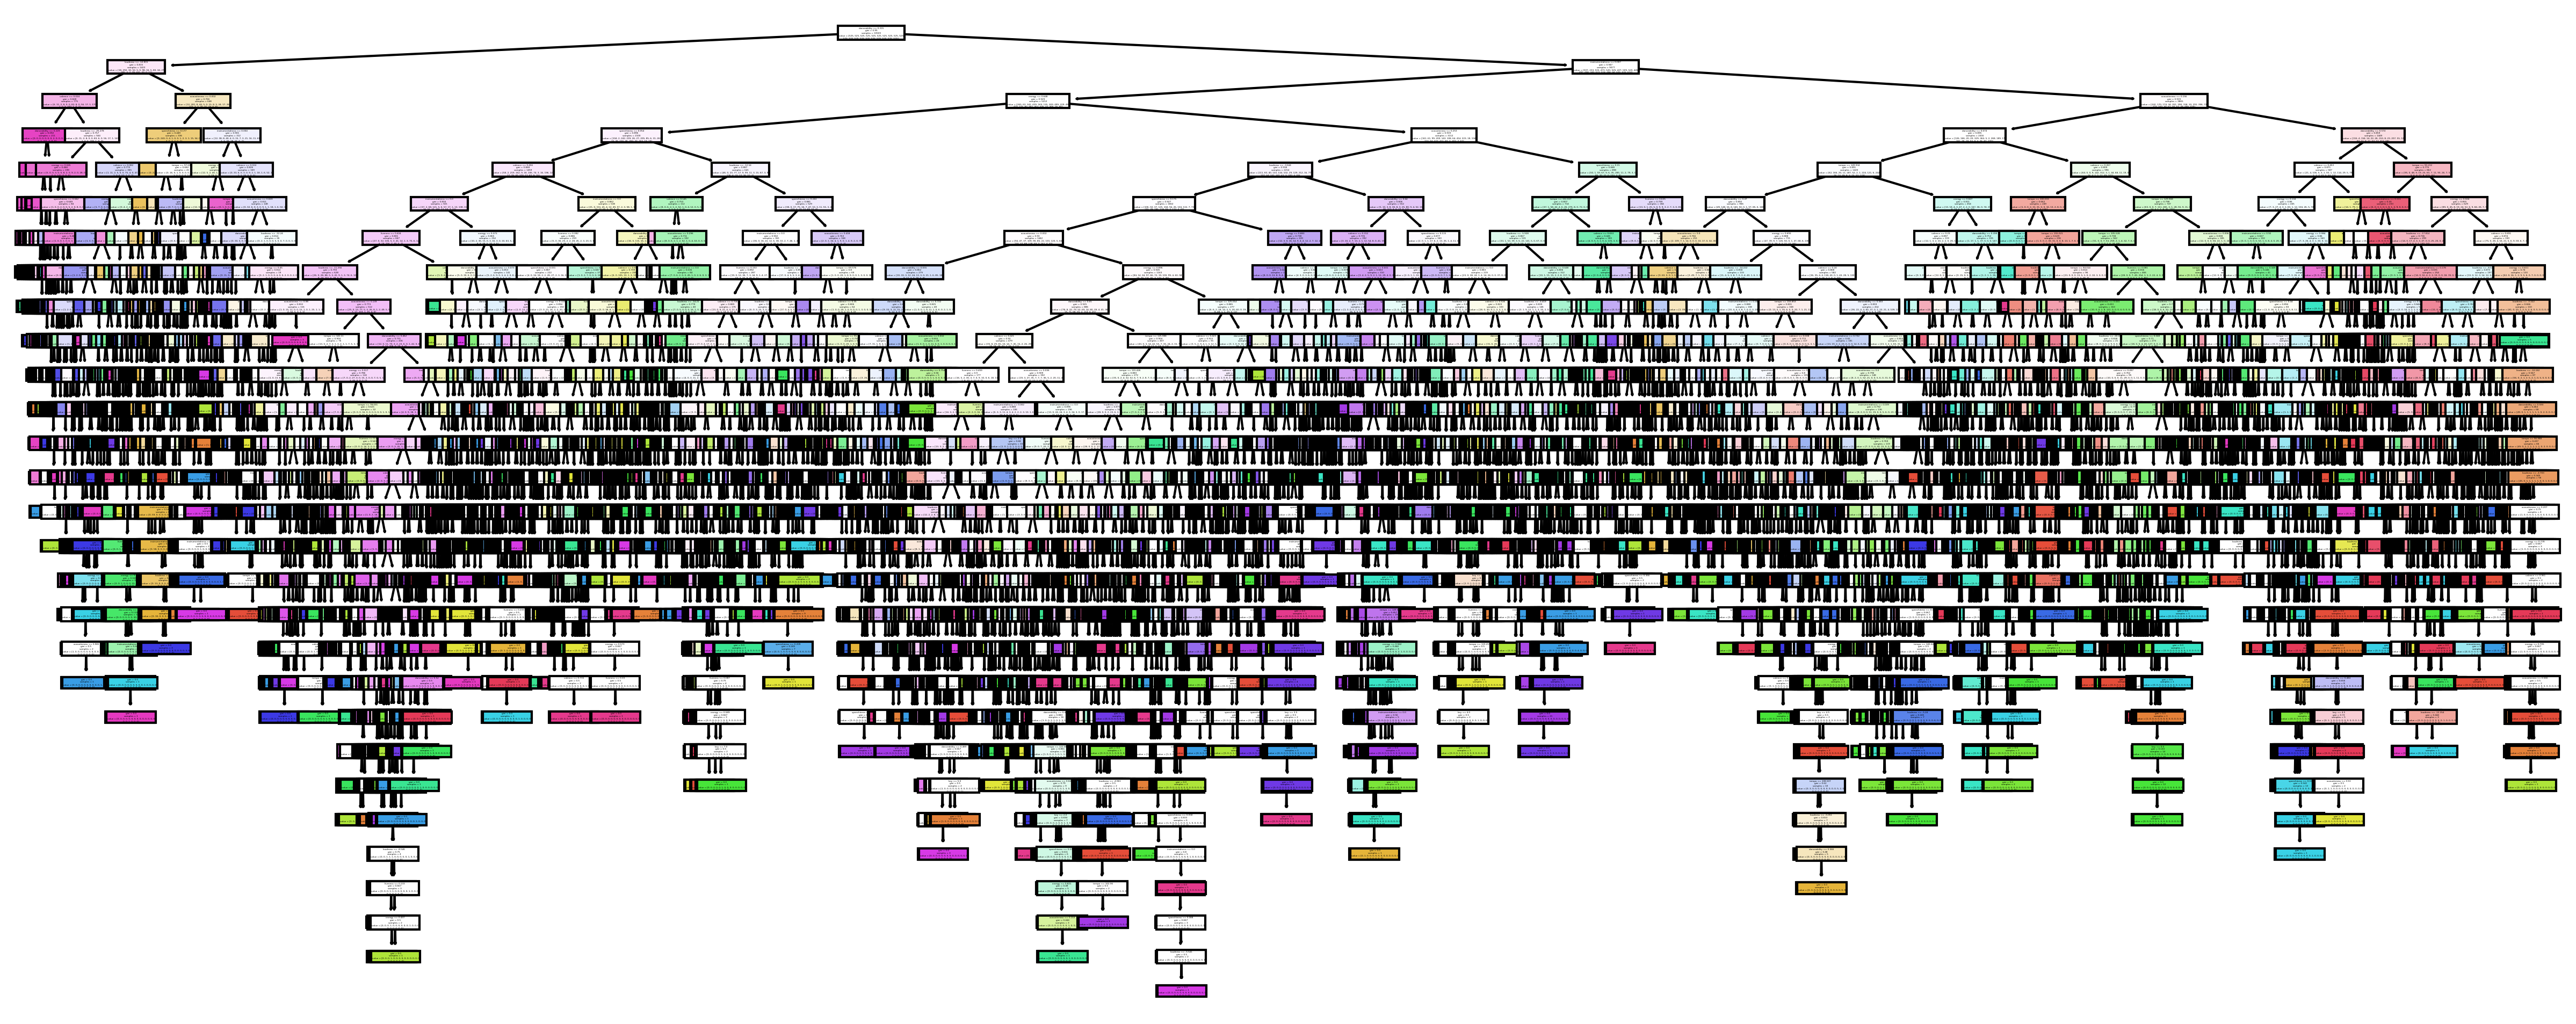

CPU times: user 7min 6s, sys: 15 s, total: 7min 21s
Wall time: 7min 24s


In [20]:
%%time
plt.figure(figsize=(20, 8), dpi=300)
plot_tree(dt, feature_names=attributes, filled=True)
plt.savefig('Decision tree VAL.png')
plt.show()

In [21]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

In [22]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [23]:
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

Train Accuracy 0.9999047619047619
Train F1-score [1.         1.         1.         1.         1.         1.
 1.         1.         0.99904853 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.99904671]

Test Accuracy 0.33644444444444443
Test F1-score [0.16877637 0.57442348 0.42685851 0.17256637 0.19954649 0.36
 0.36477987 0.46652268 0.39473684 0.24017467 0.17910448 0.25112108
 0.3125     0.32727273 0.33563218 0.32104121 0.72131148 0.11655012
 0.56561086 0.24200913]


In [24]:
print(classification_report(y_test, y_test_pred))

               precision    recall  f1-score   support

     afrobeat       0.16      0.18      0.17       225
  black-metal       0.54      0.61      0.57       225
    bluegrass       0.46      0.40      0.43       225
       brazil       0.17      0.17      0.17       225
    breakbeat       0.20      0.20      0.20       225
chicago-house       0.36      0.36      0.36       225
       disney       0.35      0.39      0.36       225
        forro       0.45      0.48      0.47       225
        happy       0.39      0.40      0.39       225
          idm       0.24      0.24      0.24       225
       indian       0.17      0.19      0.18       225
   industrial       0.25      0.25      0.25       225
      iranian       0.31      0.31      0.31       225
      j-dance       0.33      0.32      0.33       225
       j-idol       0.35      0.32      0.34       225
     mandopop       0.31      0.33      0.32       225
        sleep       0.76      0.68      0.72       225
      spa

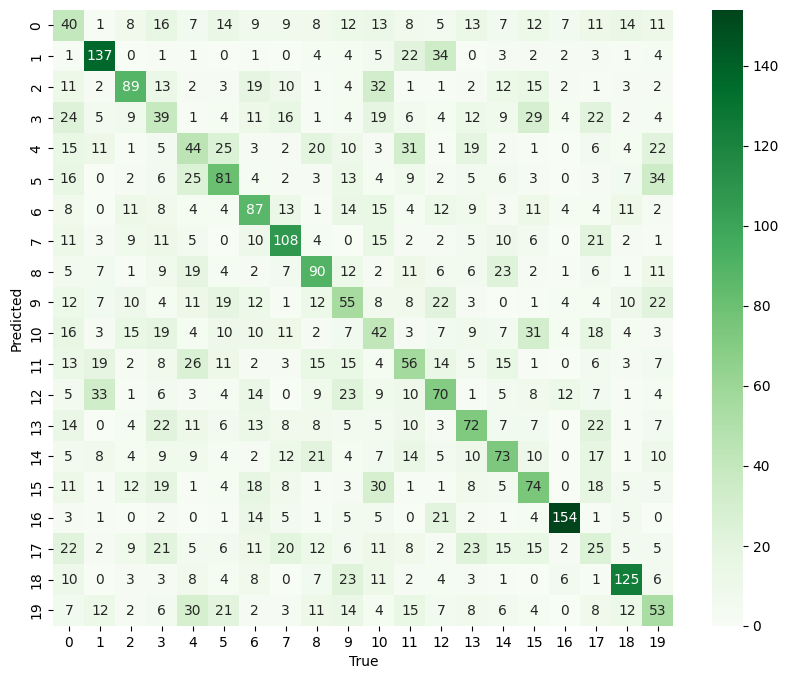

In [25]:
cf = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cf, annot=True, cmap="Greens", fmt='d')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

Feature Importance

In [26]:
zipped = zip(attributes, dt.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
for col, imp in zipped:
    print(col, imp)

danceability 0.12278394248884204
acousticness 0.11916265683733251
loudness 0.11590295906275332
valence 0.11115459038159156
tempo 0.10755635345084588
energy 0.1003420837276577
speechiness 0.09770092052256973
instrumentalness 0.09187068848590269
liveness 0.0809088270793116
key 0.05261697796319299


In [27]:
dt.feature_importances_

array([0.12278394, 0.10755635, 0.10034208, 0.11590296, 0.11916266,
       0.09770092, 0.09187069, 0.08090883, 0.11115459, 0.05261698])

In [28]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [29]:
y_test_pred

array(['spanish', 'idm', 'afrobeat', ..., 'black-metal', 'mandopop',
       'industrial'], dtype=object)

In [30]:
y_test

5129         bluegrass
9546             study
5449         breakbeat
10134           techno
7569     chicago-house
             ...      
341          bluegrass
9          black-metal
14770       industrial
3615          mandopop
4841        industrial
Name: genre, Length: 4500, dtype: object

In [31]:
dt.predict_proba(X_test)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
accuracy_score(y_test,y_test_pred)

0.33644444444444443

In [33]:
from sklearn.metrics import precision_score
precision_score(y_test,y_test_pred, average='micro')

0.33644444444444443

In [34]:
precision_score(y_test,y_test_pred, average='macro')

0.3386651532273748

In [35]:
attributes

['danceability',
 'tempo',
 'energy',
 'loudness',
 'acousticness',
 'speechiness',
 'instrumentalness',
 'liveness',
 'valence',
 'key']

In [36]:
X

array([[6.90000e-01, 1.42221e+02, 5.13000e-01, ..., 2.81000e-01,
        6.35000e-01, 5.00000e+00],
       [6.90000e-02, 7.55960e+01, 1.96000e-01, ..., 3.60000e-01,
        3.36000e-02, 1.00000e+00],
       [3.63000e-01, 1.16628e+02, 8.54000e-01, ..., 2.62000e-01,
        4.89000e-01, 2.00000e+00],
       ...,
       [7.99000e-01, 1.26000e+02, 5.35000e-01, ..., 7.13000e-02,
        7.08000e-02, 1.00000e+00],
       [5.11000e-01, 1.60044e+02, 9.70000e-01, ..., 4.02000e-01,
        2.70000e-01, 5.00000e+00],
       [6.78000e-01, 8.80030e+01, 5.18000e-01, ..., 8.80000e-02,
        7.84000e-01, 6.00000e+00]])

In [37]:
feature_importance = pd.DataFrame(dt.feature_importances_, index = attributes).sort_values(0, ascending=False)
feature_importance

0
danceability      0.122784
acousticness      0.119163
loudness          0.115903
valence           0.111155
tempo             0.107556
energy            0.100342
speechiness       0.097701
instrumentalness  0.091871
liveness          0.080909
key               0.052617

<Axes: >

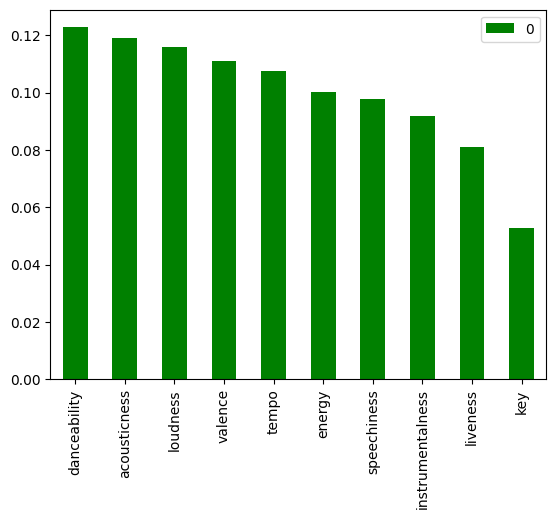

In [38]:
feature_importance.plot(kind='bar', color='green')

#### Decision Tree hyperparameters
max_depth : int, default=None <br>
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int or float, default=2 <br>
    The minimum number of samples required to split an internal node:

    - If int, then consider `min_samples_split` as the minimum number.
    - If float, then `min_samples_split` is a fraction and
      `ceil(min_samples_split * n_samples)` are the minimum
      number of samples for each split.

min_samples_leaf : int or float, default=1 <br>
    The minimum number of samples required to be at a leaf node.
    A split point at any depth will only be considered if it leaves at
    least ``min_samples_leaf`` training samples in each of the left and
    right branches.  This may have the effect of smoothing the model,
    especially in regression.

    - If int, then consider `min_samples_leaf` as the minimum number.
    - If float, then `min_samples_leaf` is a fraction and
      `ceil(min_samples_leaf * n_samples)` are the minimum
      number of samples for each node.

In [39]:
from sklearn.model_selection import cross_val_score

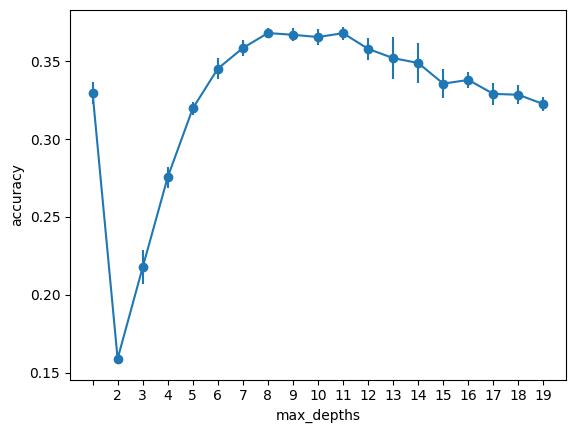

In [40]:
max_depths = [None] + list(np.arange(2, 20))
avg_scores = list()
std_scores = list()

for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(range(len(max_depths)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(max_depths)), max_depths)
plt.xlabel("max_depths")
plt.ylabel("accuracy")
plt.show()

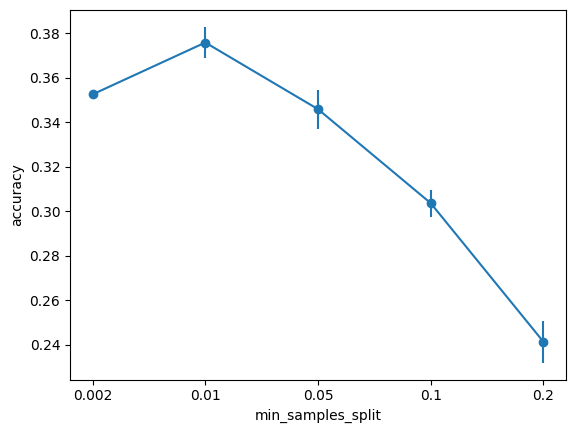

In [41]:
min_samples_splits = [0.002, 0.01, 0.05, 0.1, 0.2]
avg_scores = list()
std_scores = list()

for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(range(len(min_samples_splits)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(min_samples_splits)), min_samples_splits)
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.show()

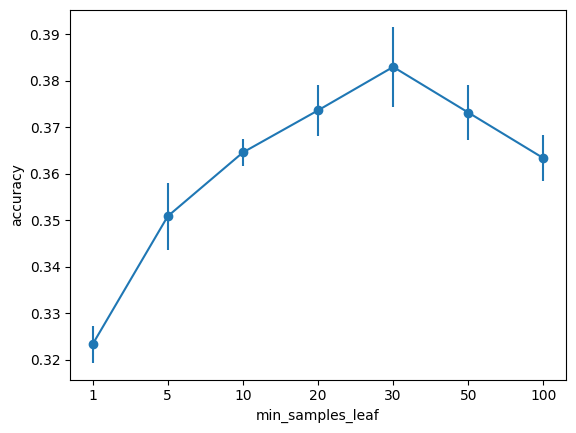

In [42]:
min_samples_leafs = [1, 5, 10, 20, 30, 50, 100]
avg_scores = list()
std_scores = list()

for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(range(len(min_samples_leafs)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(min_samples_leafs)), min_samples_leafs)
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.show()

### Randomized Search

In [43]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [44]:
%%time
param_list = {
    'max_depth': [None] + list(np.arange(2, 20)),
    'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
    'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
    'criterion': ['gini', 'entropy']
}

clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_list,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
    n_iter=200,
    #verbose=2
)

random_search.fit(X_train, y_train)
clf = random_search.best_estimator_

CPU times: user 39.4 s, sys: 5.33 s, total: 44.8 s
Wall time: 20min 49s


In [45]:
print(random_search.best_params_, random_search.best_score_)

{'min_samples_split': 50, 'min_samples_leaf': 20, 'max_depth': 12, 'criterion': 'gini'} 0.38084761904761905


In [46]:
y_test_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Accuracy: 0.3748888888888889


In [47]:
clf.score(X_test, y_test)

0.3748888888888889

In [48]:
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

Train Accuracy 0.9999047619047619
Train F1-score [1.         1.         1.         1.         1.         1.
 1.         1.         0.99904853 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.99904671]

Test Accuracy 0.3748888888888889
Test F1-score [0.17266187 0.6625     0.42323651 0.24197531 0.25       0.44789357
 0.32038835 0.45756458 0.36111111 0.22222222 0.13895782 0.28996283
 0.38       0.43083004 0.37875289 0.40441176 0.74340528 0.11267606
 0.59751037 0.2955665 ]


In [49]:
print(classification_report(y_test, y_test_pred))

               precision    recall  f1-score   support

     afrobeat       0.19      0.16      0.17       225
  black-metal       0.62      0.71      0.66       225
    bluegrass       0.40      0.45      0.42       225
       brazil       0.27      0.22      0.24       225
    breakbeat       0.29      0.22      0.25       225
chicago-house       0.45      0.45      0.45       225
       disney       0.35      0.29      0.32       225
        forro       0.39      0.55      0.46       225
        happy       0.33      0.40      0.36       225
          idm       0.24      0.21      0.22       225
       indian       0.16      0.12      0.14       225
   industrial       0.25      0.35      0.29       225
      iranian       0.43      0.34      0.38       225
      j-dance       0.39      0.48      0.43       225
       j-idol       0.39      0.36      0.38       225
     mandopop       0.34      0.49      0.40       225
        sleep       0.81      0.69      0.74       225
      spa

In [50]:
results = pd.DataFrame(random_search.cv_results_)

<Axes: xlabel='param_max_depth', ylabel='mean_test_score'>

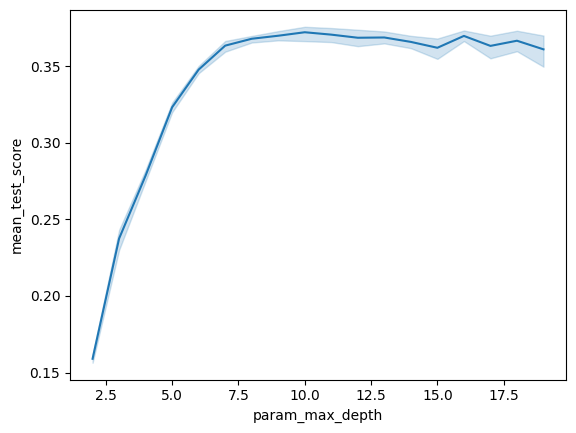

In [51]:
sns.lineplot(data=results, x="param_max_depth", y="mean_test_score")

<Axes: xlabel='param_min_samples_leaf', ylabel='mean_test_score'>

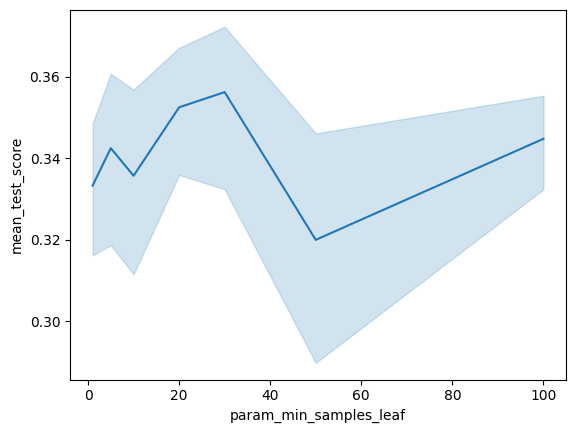

In [52]:
sns.lineplot(data=results, x="param_min_samples_leaf", y="mean_test_score")

In [53]:
zipped = zip(attributes, clf.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
for col, imp in zipped:
    print(col, imp)

danceability 0.17765527532470016
acousticness 0.13611881531781966
loudness 0.13435404720876873
valence 0.11880916849285256
instrumentalness 0.11377858099770173
energy 0.10326878637099698
tempo 0.1027601215111002
speechiness 0.07686971528209866
liveness 0.03108357483868095
key 0.005301914655280315


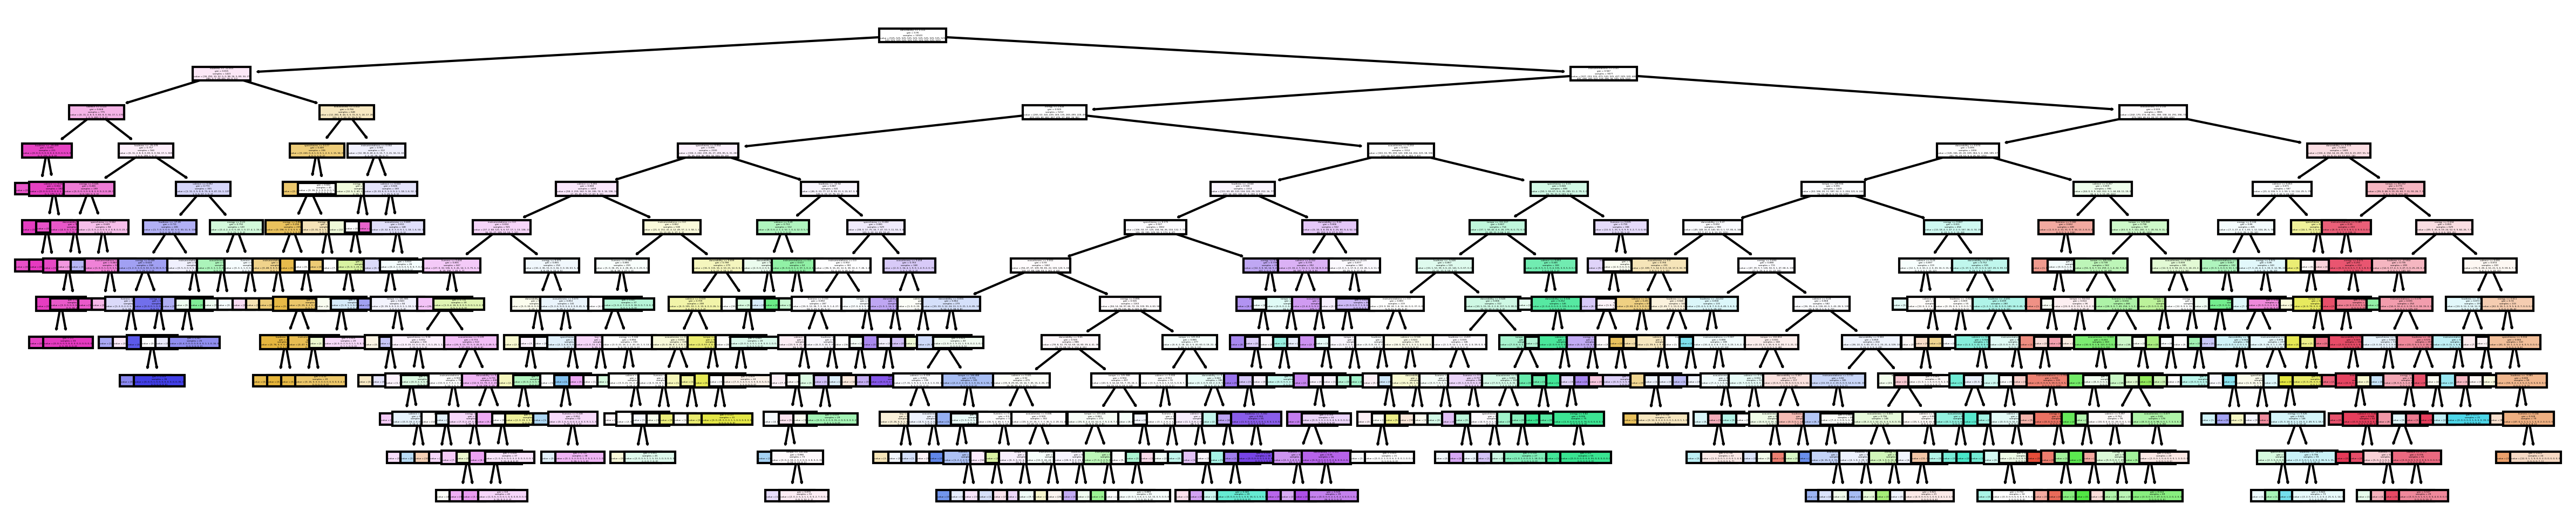

In [54]:
plt.figure(figsize=(20, 4), dpi=300)
plot_tree(clf, feature_names=attributes, filled=True)
plt.show()

#### ccp_alphas
Minimal cost complexity pruning recursively finds the node with the “weakest link”. The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. <br>
Sklearn decision tree offers a function that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [55]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [56]:
for alpha, imp in zip(ccp_alphas, impurities):
    print(alpha, imp)

0.0 0.7377219947521528
2.4285437558646842e-05 0.7377462801897114
0.00014861746641281395 0.7378948976561243
0.0002255069026841465 0.7381204045588085
0.00027990878460038005 0.7384003133434088
0.00034128631264701906 0.7387415996560559
0.000384363817621098 0.739125963473677
0.0004167841210213491 0.7395427475946983
0.00042054163216390973 0.7399632892268622
0.0004263162265703453 0.7403896054534325
0.0004405121645952269 0.7408301176180276
0.00044496301129964486 0.7412750806293272
0.0004652220387629698 0.7417403026680902
0.0004934481199538182 0.742233750788044
0.0005086589561086909 0.7427424097441527
0.0005092501633421724 0.7432516599074949
0.0006208464999877296 0.7438725064074826
0.0006398268398268396 0.7445123332473095
0.000640758671516424 0.745153091918826
0.000650763749360966 0.745803855668187
0.0006541206629498732 0.7464579763311369
0.0006667555761503512 0.7477914874834376
0.0006703789476174143 0.7484618664310551
0.000704487656438265 0.7491663540874933
0.000706998428283815 0.7498733525157

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

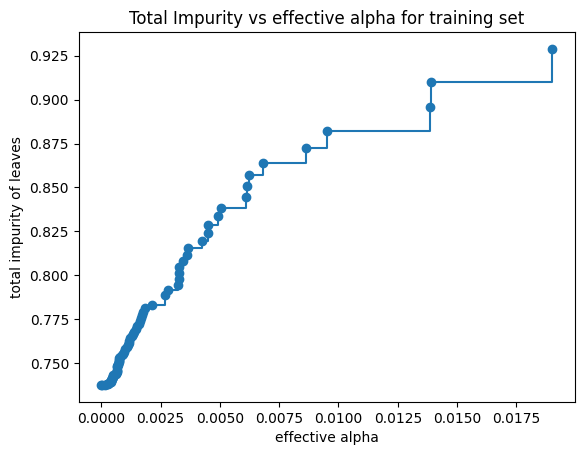

In [57]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [59]:
random_search.best_params_

{'min_samples_split': 50,
 'min_samples_leaf': 20,
 'max_depth': 12,
 'criterion': 'gini'}

In [60]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, **random_search.best_params_)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 3 with ccp_alpha: 0.02119343825849751


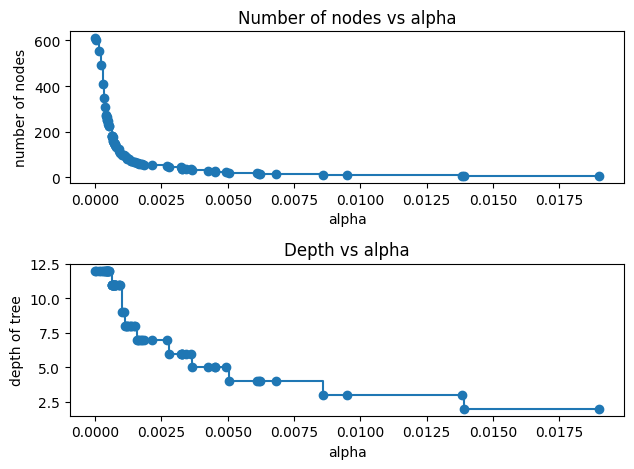

In [61]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

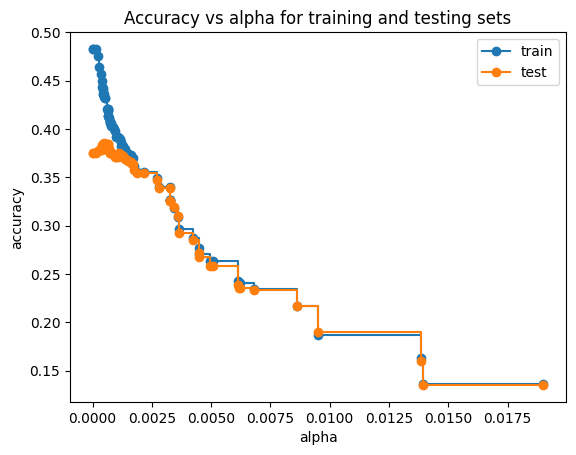

In [62]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [63]:
dtp = DecisionTreeClassifier(random_state=0, ccp_alpha=0.006, **random_search.best_params_)
dtp.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.006, max_depth=12, min_samples_leaf=20,
                       min_samples_split=50, random_state=0)

In [64]:
y_test_pred = dtp.predict(X_test)

In [65]:
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

Train Accuracy 0.9999047619047619
Train F1-score [1.         1.         1.         1.         1.         1.
 1.         1.         0.99904853 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.99904671]

Test Accuracy 0.25822222222222224
Test F1-score [0.         0.63215259 0.         0.         0.         0.40930233
 0.         0.39308176 0.         0.1564482  0.         0.23952096
 0.18918919 0.         0.23559759 0.29464286 0.62043796 0.
 0.48903879 0.        ]


In [66]:
y_test_pred = dtp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Accuracy: 0.25822222222222224


In [67]:
print(classification_report(y_test, y_test_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

     afrobeat       0.00      0.00      0.00       225
  black-metal       0.82      0.52      0.63       225
    bluegrass       0.00      0.00      0.00       225
       brazil       0.00      0.00      0.00       225
    breakbeat       0.00      0.00      0.00       225
chicago-house       0.31      0.59      0.41       225
       disney       0.00      0.00      0.00       225
        forro       0.30      0.56      0.39       225
        happy       0.00      0.00      0.00       225
          idm       0.15      0.16      0.16       225
       indian       0.00      0.00      0.00       225
   industrial       0.16      0.44      0.24       225
      iranian       0.24      0.16      0.19       225
      j-dance       0.00      0.00      0.00       225
       j-idol       0.15      0.61      0.24       225
     mandopop       0.18      0.73      0.29       225
        sleep       0.53      0.76      0.62       225
      spa

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


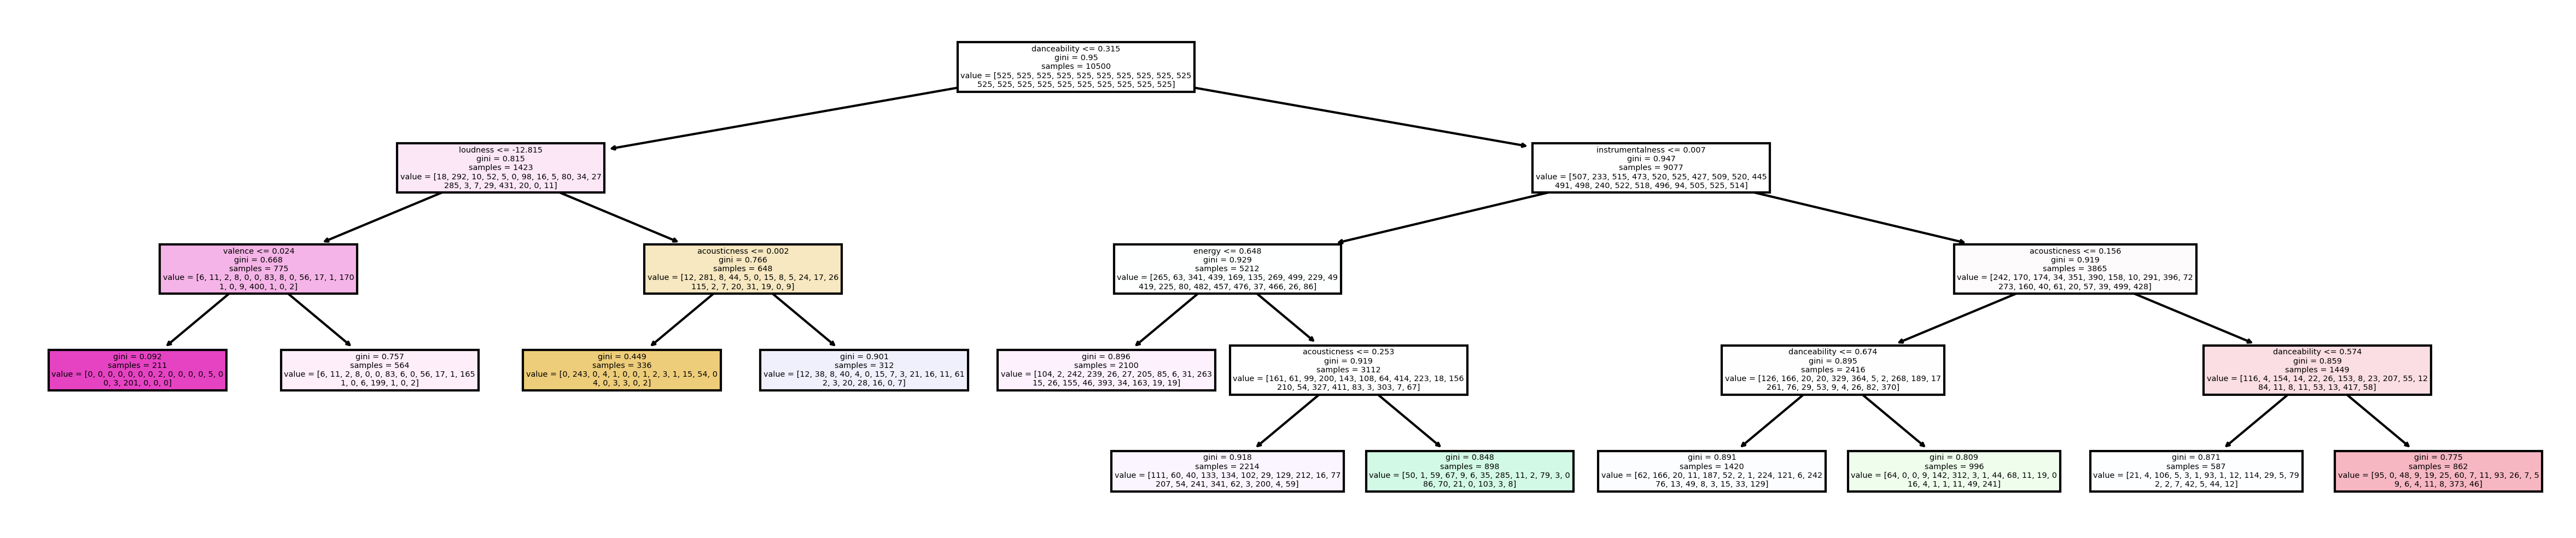

In [68]:
plt.figure(figsize=(20, 4), dpi=300)
plot_tree(dtp, feature_names=attributes, filled=True)
plt.show()

In [72]:
!pip install scikit-plot

from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

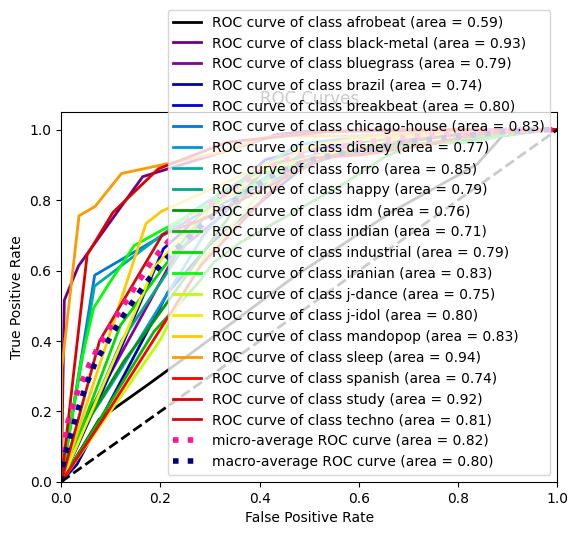

In [73]:
plot_roc(y_test, dtp.predict_proba(X_test))
plt.show()

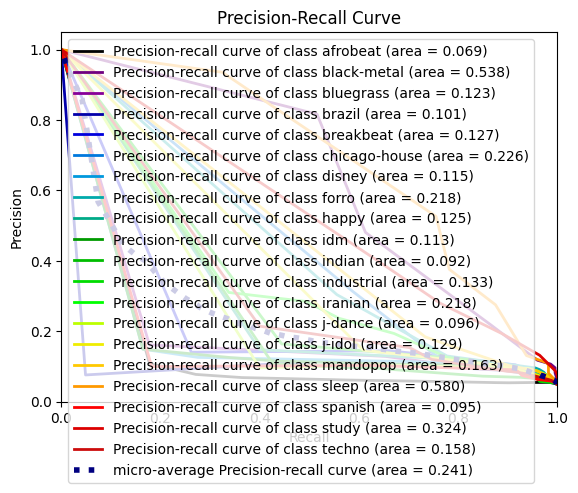

In [74]:
plot_precision_recall(y_test, dtp.predict_proba(X_test))
plt.show()